In [1]:
import yt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy import units as u, constants  as c
import os

pc = c.pc.cgs.value
kB  = c.k_B.cgs.value
Msun = c.M_sun.cgs.value
G = c.G.cgs.value
Myr = u.Myr.in_units("s")

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "text.latex.preamble" : r'\boldmath'
})
377185538938536.25/Myr

11.952288480066173

yt : [INFO     ] 2025-03-03 11:17:04,645 Parameters: current_time              = 252320228137824.56
yt : [INFO     ] 2025-03-03 11:17:04,646 Parameters: domain_dimensions         = [8 8 8]
yt : [INFO     ] 2025-03-03 11:17:04,648 Parameters: domain_left_edge          = [-7.715e+20 -7.715e+20 -7.715e+20]
yt : [INFO     ] 2025-03-03 11:17:04,648 Parameters: domain_right_edge         = [7.715e+20 7.715e+20 7.715e+20]
yt : [INFO     ] 2025-03-03 11:17:04,649 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2025-03-03 11:17:04,720 Parameters: current_time              = 340597785179995.1
yt : [INFO     ] 2025-03-03 11:17:04,722 Parameters: domain_dimensions         = [8 8 8]
yt : [INFO     ] 2025-03-03 11:17:04,723 Parameters: domain_left_edge          = [-7.715e+20 -7.715e+20 -7.715e+20]
yt : [INFO     ] 2025-03-03 11:17:04,723 Parameters: domain_right_edge         = [7.715e+20 7.715e+20 7.715e+20]
yt : [INFO     ] 2025-03-03 11:17:04,724 Parameters: cosmological_simulation   = 0

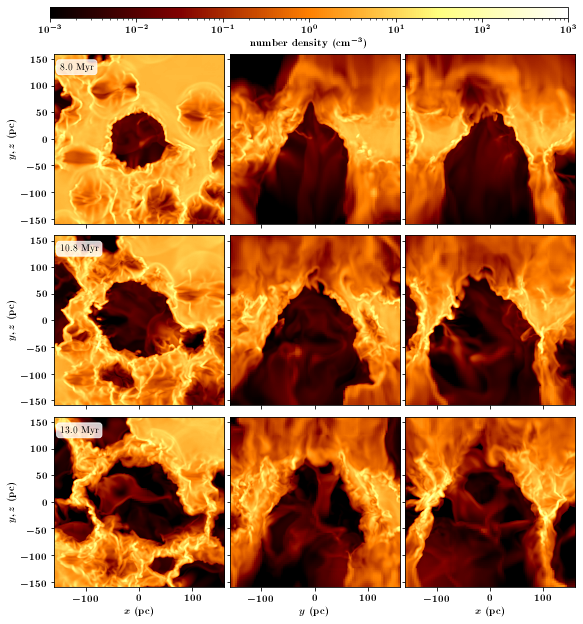

In [68]:
#dat = np.random.uniform(size=32*32).reshape(32,32)

#files = ["SILCC_hdf5_plt_cnt_0900", "SILCC_hdf5_plt_cnt_1000", "SILCC_hdf5_plt_cnt_1100", "SILCC_hdf5_plt_cnt_1200"]
files = ["SILCC_hdf5_plt_cnt_0800", "SILCC_hdf5_plt_cnt_1080", "SILCC_hdf5_plt_cnt_1300"]#, "SILCC_hdf5_plt_cnt_2100"]
#files = 4*["SILCC_hdf5_plt_cnt_1080"]
c = [-80*pc, -150*pc, 0*pc]

x0 = 160
extent=[-x0, x0, -x0, x0]
fig, ax = plt.subplots(figsize=(8,8), ncols=3, nrows=3, sharex=True, sharey=True)
for ir in range(3):
    ds = yt.load("/Users/girichidis/Physics/Data/SILCC-cubic/L7-CM6/"+files[ir])
    for ic, d in enumerate(["z","x","y"]):
        lfile="datafiles/"+files[ir]+"-"+d+"-number-density.npy"
        if os.path.isfile(lfile):
            dat = np.load(lfile)
        else:
            dat = np.array(yt.SlicePlot(ds, d, ("gas","number_density"), center=c).data_source.to_frb((2*x0, "pc"), 800)[("gas", "number_density")])
            np.save(lfile, dat)
            dat = np.load(lfile)
        if d == "y":
            plt_dat = dat.T
        else:
            plt_dat = dat
        im = ax[ir,ic].imshow(plt_dat, origin="lower", extent=extent, norm=LogNorm(vmin=1e-3, vmax=1e3), cmap="afmhot")
    ax[ir,0].text(-150,130, str(np.round(ds.current_time.in_units("Myr").v,1))+" Myr",\
                 bbox=dict(facecolor='white', edgecolor='white', boxstyle='round', alpha=0.8))
    ax[ir,0].set_ylabel("$y,z~\\mathrm{(pc)}$")
ax[2,0].set_xlabel("$x~\\mathrm{(pc)}$")
ax[2,1].set_xlabel("$y~\\mathrm{(pc)}$")
ax[2,2].set_xlabel("$x~\\mathrm{(pc)}$")

cbar_ax = fig.add_axes([0.08, 1.05, 0.9, 0.02])
fig.colorbar(im, orientation="horizontal", cax=cbar_ax, label="\\textbf{number density }$\\mathrm{(cm^{-3})}$")

fig.tight_layout(pad=0.5)
fig.savefig("plots/bubble-time-evol.pdf", bbox_inches="tight")

yt : [INFO     ] 2025-04-03 10:17:36,356 Parameters: current_time              = 340590382120411.7
yt : [INFO     ] 2025-04-03 10:17:36,358 Parameters: domain_dimensions         = [8 8 8]
yt : [INFO     ] 2025-04-03 10:17:36,359 Parameters: domain_left_edge          = [-7.715e+20 -7.715e+20 -7.715e+20]
yt : [INFO     ] 2025-04-03 10:17:36,360 Parameters: domain_right_edge         = [7.715e+20 7.715e+20 7.715e+20]
yt : [INFO     ] 2025-04-03 10:17:36,360 Parameters: cosmological_simulation   = 0


('gas', 'number_density')


yt : [INFO     ] 2025-04-03 10:17:43,725 xlim = -1018354206519309369344.000000 524645793480690630656.000000
yt : [INFO     ] 2025-04-03 10:17:43,725 ylim = -1234351637223705149440.000000 308648362776294916096.000000
yt : [INFO     ] 2025-04-03 10:17:43,726 xlim = -1018354206519309369344.000000 524645793480690630656.000000
yt : [INFO     ] 2025-04-03 10:17:43,726 ylim = -1234351637223705149440.000000 308648362776294916096.000000
yt : [INFO     ] 2025-04-03 10:17:43,727 Making a fixed resolution buffer of (('gas', 'number_density')) 800 by 800
yt : [INFO     ] 2025-04-03 10:17:44,371 xlim = -1234351637223705149440.000000 308648362776294916096.000000
yt : [INFO     ] 2025-04-03 10:17:44,372 ylim = -771500000000000000000.000000 771500000000000000000.000000
yt : [INFO     ] 2025-04-03 10:17:44,373 xlim = -1234351637223705149440.000000 308648362776294916096.000000
yt : [INFO     ] 2025-04-03 10:17:44,373 ylim = -771500000000000000000.000000 771500000000000000000.000000
yt : [INFO     ] 2025-

('gas', 'magnetic_field_strength')


yt : [INFO     ] 2025-04-03 10:17:45,990 xlim = -1018354206519309369344.000000 524645793480690630656.000000
yt : [INFO     ] 2025-04-03 10:17:45,991 ylim = -1234351637223705149440.000000 308648362776294916096.000000
yt : [INFO     ] 2025-04-03 10:17:45,991 xlim = -1018354206519309369344.000000 524645793480690630656.000000
yt : [INFO     ] 2025-04-03 10:17:45,992 ylim = -1234351637223705149440.000000 308648362776294916096.000000
yt : [INFO     ] 2025-04-03 10:17:45,993 Making a fixed resolution buffer of (('gas', 'magnetic_field_strength')) 800 by 800
yt : [INFO     ] 2025-04-03 10:17:46,640 xlim = -1234351637223705149440.000000 308648362776294916096.000000
yt : [INFO     ] 2025-04-03 10:17:46,641 ylim = -771500000000000000000.000000 771500000000000000000.000000
yt : [INFO     ] 2025-04-03 10:17:46,641 xlim = -1234351637223705149440.000000 308648362776294916096.000000
yt : [INFO     ] 2025-04-03 10:17:46,642 ylim = -771500000000000000000.000000 771500000000000000000.000000
yt : [INFO   

('gas', 'electron_number_density')


yt : [INFO     ] 2025-04-03 10:17:47,400 xlim = -1018354206519309369344.000000 524645793480690630656.000000
yt : [INFO     ] 2025-04-03 10:17:47,401 ylim = -1234351637223705149440.000000 308648362776294916096.000000
yt : [INFO     ] 2025-04-03 10:17:47,401 xlim = -1018354206519309369344.000000 524645793480690630656.000000
yt : [INFO     ] 2025-04-03 10:17:47,402 ylim = -1234351637223705149440.000000 308648362776294916096.000000
yt : [INFO     ] 2025-04-03 10:17:47,402 Making a fixed resolution buffer of (('gas', 'electron_number_density')) 800 by 800
yt : [INFO     ] 2025-04-03 10:17:47,958 xlim = -1234351637223705149440.000000 308648362776294916096.000000
yt : [INFO     ] 2025-04-03 10:17:47,959 ylim = -771500000000000000000.000000 771500000000000000000.000000
yt : [INFO     ] 2025-04-03 10:17:47,959 xlim = -1234351637223705149440.000000 308648362776294916096.000000
yt : [INFO     ] 2025-04-03 10:17:47,960 ylim = -771500000000000000000.000000 771500000000000000000.000000
yt : [INFO   

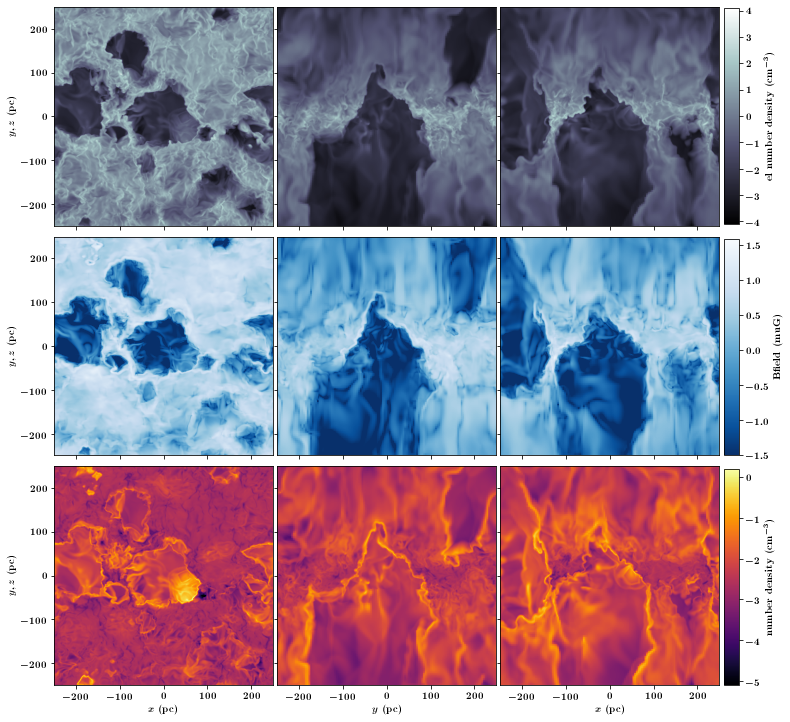

In [27]:
#dat = np.random.uniform(size=32*32).reshape(32,32)
def _el_n(field, data):
    return data[("gas", "number_density")] * data[("flash", "ihp ")]
yt.add_field(('gas', 'electron_number_density'), _el_n, sampling_type="local", units="cm**(-3)", force_override=True)

dbar = 0.3
dd = 0.02

if False:
    file  = "/Users/girichidis/Physics/Data/SILCC-cubic/L7-CM6/SILCC_hdf5_plt_cnt_1080"
    ofile = "B6-1pc.pdf"
else:
    file  = "/Users/girichidis/Physics/Data/SILCC-cubic/L7/B3-1pc/SILCC_hdf5_plt_cnt_1080"
    ofile = "B3-1pc.pdf"
    
c = [-80*pc, -150*pc, 0*pc]

fields = [("gas", "number_density"), ("gas", "magnetic_field_strength"), ("gas", "electron_number_density")]
mins = [-4.1, -1.5, -5.1]
maxs = [4.1, 1.6, 0.2]
fac = [1, 1e6, 1]
cmaps = ["bone", "Blues_r", "inferno"]

x0 = 250
extent=[-x0, x0, -x0, x0]
fig, ax = plt.subplots(figsize=(10,10), ncols=3, nrows=3, sharex=True, sharey=True)
ds = yt.load(file)
for ir, field, vmin, vmax, cmap, f in zip(range(3), fields, mins, maxs, cmaps, fac):
    print(field)
    for ic, d in enumerate(["z","x","y"]):
        dat = np.array(yt.SlicePlot(ds, d, field, center=c).data_source.to_frb((2*x0, "pc"), 800)[field])
        if d == "y":
            plt_dat = np.log10(dat.T*f)
        else:
            plt_dat = np.log10(dat*f)
        im = ax[ir,ic].imshow(plt_dat, origin="lower", extent=extent, \
                              vmin=vmin, vmax=vmax, cmap=cmap)
    #ax[ir,0].text(-150,130, str(np.round(ds.current_time.in_units("Myr").v,1))+" Myr",\
    #             bbox=dict(facecolor='white', edgecolor='white', boxstyle='round', alpha=0.8))
    ax[ir,0].set_ylabel("$y,z~\\mathrm{(pc)}$")

    if ir == 2:
        cbar_ax = fig.add_axes([1.0, 0.05, 0.02, dbar])
        fig.colorbar(im, orientation="vertical", cax=cbar_ax, label="\\textbf{number density }$\\mathrm{(cm^{-3})}$")
    if ir == 1:
        cbar_ax = fig.add_axes([1.0, 0.05+dbar+dd, 0.02, dbar])
        fig.colorbar(im, orientation="vertical", cax=cbar_ax, label="\\textbf{Bfield }$\\mathrm{(muG)}$")
    if ir == 0:
        cbar_ax = fig.add_axes([1.0, 0.05+2*(dbar+dd), 0.02, dbar])
        fig.colorbar(im, orientation="vertical", cax=cbar_ax, label="\\textbf{el number density }$\\mathrm{(cm^{-3})}$")

ax[2,0].set_xlabel("$x~\\mathrm{(pc)}$")
ax[2,1].set_xlabel("$y~\\mathrm{(pc)}$")
ax[2,2].set_xlabel("$x~\\mathrm{(pc)}$")
fig.tight_layout(pad=0.5)
fig.savefig("plots-compare-B3-B6/"+ofile, bbox_inches="tight")

In [11]:
cbar_ax = fig.add_axes([0.94, 0.05, 0.02, 0.3])
fig.colorbar(im, orientation="vertical", cax=cbar_ax, label="\\textbf{number density }$\\mathrm{(cm^{-3})}$")

#fig.tight_layout(pad=0.5)
#fig.savefig("plots/bubble-time-evol.pdf", bbox_inches="tight")

In [12]:
plt.show()